In [182]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

[1] 데이터 준비

In [183]:
# # 기본 : ndarray 형태로 반환
# # 반환값 : Bunch 객체로 dict와 유사
# diabetes = load_diabetes()
# diabetes['data']

In [184]:
# 기본 : DataFrame 형태로 반환
# 반환값 : Bunch 객체로 dict와 유사
diabetes = load_diabetes(as_frame = True, scaled = False)
diabetes['data']

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [185]:
# # 기본 : ndarray 형태로 반환
# # 반환값 : tuple로 data와 target만 반환
# data, target = load_diabetes(return_X_y=True)
# type(data)

In [186]:
# # 기본 : DataFrame 형태로 반환
# # 반환값 : tuple로 data와 target만 반환
# data, target = load_diabetes(return_X_y=True, as_frame=True)
# type(data)

In [187]:
# 키 값
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [188]:
# 당뇨병 데이터셋 설명
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

[2] 피쳐/타겟 분리

> s1 : 총 혈청 콜레스테롤  
> s2 : 저밀도 지단백  
> s3 : 고밀도 지단백  
> s4 : 총 콜레스테롤  
> s5 : 혈청 트리글리세리드 수치의 log값  
> s6 : 혈당 수치  

In [189]:
# 피쳐
features = diabetes['data']
features

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [190]:
# 타겟 (1년동안 당뇨병 진행을 정량적으로 나타낸 것)
target = diabetes['target']
target

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

[3] EDA(탐색적 자료 분석)

In [191]:
diabetes['data']['target'] = target
df = diabetes['data']
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


In [192]:
df.corr(numeric_only=True)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


> target과 상관계수의 절대값이 0.35보다 큰 변수를 선택하기로 결정 (bmi, bp, s3, s4, s5, s6)

In [193]:
corr_matrix = df[['bmi', 'bp', 's3', 's4', 's5', 's6']].corr()
corr_matrix

,bmi,bp,s3,s4,s5,s6
bmi,1.000000,0.395411,-0.366811,0.413807,0.446157,0.388680
bp,0.395411,1.000000,-0.178762,0.257650,0.393480,0.390430
s3,-0.366811,-0.178762,1.000000,-0.738493,-0.398577,-0.273697
s4,0.413807,0.257650,-0.738493,1.000000,0.617859,0.417212
s5,0.446157,0.393480,-0.398577,0.617859,1.000000,0.464669
s6,0.388680,0.390430,-0.273697,0.417212,0.464669,1.000000


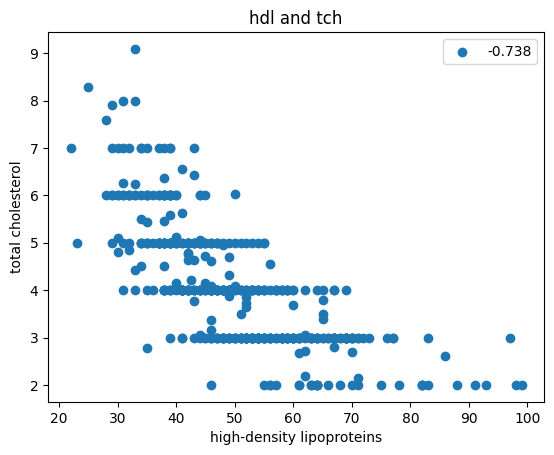

In [194]:
plt.scatter(features['s3'], features['s4'], label = round(corr_matrix['s3']['s4'], 3))
plt.title('hdl and tch')
plt.xlabel('high-density lipoproteins')
plt.ylabel('total cholesterol')
plt.legend()
plt.show()

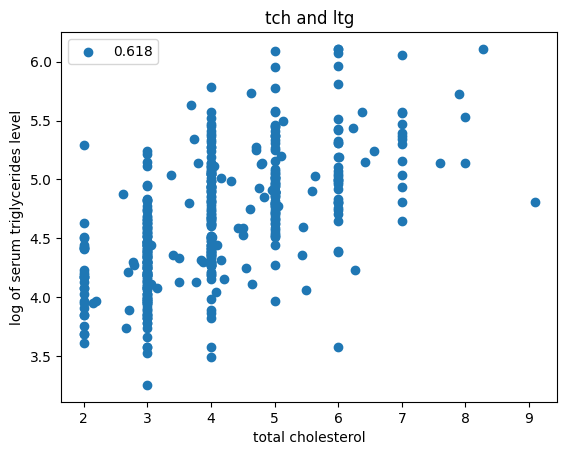

In [195]:
plt.scatter(features['s4'], features['s5'], label = round(corr_matrix['s4']['s5'], 3))
plt.title('tch and ltg')
plt.xlabel('total cholesterol')
plt.ylabel('log of serum triglycerides level')
plt.legend()
plt.show()

> (s3, s4), (s4, s5)의 상관관계가 높게 나타났으며 다중공선성을 고려하여 공통적으로 포함하고 있는 s4 변수를 제외

In [196]:
final_feature = df[['bmi', 'bp', 's3', 's5', 's6']]
final_feature.head()

,bmi,bp,s3,s5,s6
0,32.1,101.0,38.0,4.8598,87.0
1,21.6,87.0,70.0,3.8918,69.0
2,30.5,93.0,41.0,4.6728,85.0
3,25.3,84.0,40.0,4.8903,89.0
4,23.0,101.0,52.0,4.2905,80.0


In [197]:
target[:5]

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [198]:
print(f"{final_feature.shape}, {final_feature.ndim}D")
print(f"{target.shape}, {target.ndim}D")

(442, 5), 2D
(442,), 1D


[4] 훈련/테스트 세트 분할

In [199]:
X_train, X_test, y_train, y_test = train_test_split(final_feature, target, train_size=0.8, random_state=42)

In [200]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [201]:
print(f"{X_train.shape}, {X_train.ndim}D")
print(f"{y_train.shape}, {y_train.ndim}D")

print(f"{X_test.shape}, {X_test.ndim}D")
print(f"{y_test.shape}, {y_test.ndim}D")

(353, 5), 2D
(353,), 1D
(89, 5), 2D
(89,), 1D


In [202]:
len(X_train) / len(final_feature), len(X_test) / len(final_feature) # 8 : 2 비율로 잘 나눠짐

(0.7986425339366516, 0.20135746606334842)

[5] 피쳐 스케일링

In [203]:
mm = MinMaxScaler()

mm.fit(X_train)

MinMaxScaler()

In [204]:
print(f"스케일링 전 최솟값 : {mm.data_min_}\n스케일링 후 최솟값 : {mm.min_}")
print(f"스케일링 전 최댓값 : {mm.data_max_}\n스케일링 후 최댓값 : {mm.scale_}")

스케일링 전 최솟값 : [18.1    62.     22.      3.2581 58.    ]
스케일링 후 최솟값 : [-0.78017241 -0.87323944 -0.28571429 -1.14363439 -0.87878788]
스케일링 전 최댓값 : [ 41.3   133.     99.      6.107 124.   ]
스케일링 후 최댓값 : [0.04310345 0.01408451 0.01298701 0.35101267 0.01515152]


In [205]:
X_train_scaled = mm.transform(X_train)
X_test_scaled = mm.transform(X_test)

In [206]:
X_train_scaled[:5], X_test_scaled[:5]

(array([[0.40517241, 0.69014085, 0.22077922, 0.59092983, 0.5       ],
        [0.28448276, 0.32394366, 0.1038961 , 0.48660887, 0.57575758],
        [0.55603448, 0.85915493, 0.33766234, 0.5511601 , 0.45454545],
        [0.21551724, 0.33802817, 0.46753247, 0.2935168 , 0.03030303],
        [0.09482759, 0.12676056, 0.57142857, 0.34258837, 0.34848485]]),
 array([[0.33189655, 0.3943662 , 0.42857143, 0.61044614, 0.48484848],
        [0.50431034, 0.54929577, 0.36363636, 0.3988557 , 0.42424242],
        [0.34051724, 0.4084507 , 0.55844156, 0.81090947, 0.43939394],
        [0.56465517, 0.78408451, 0.09090909, 0.86542174, 0.72727273],
        [0.27586207, 0.45070423, 0.33766234, 0.46575871, 0.46969697]]))

In [207]:
print(f"{X_train_scaled.shape}, {X_train_scaled.ndim}D")
print(f"{X_test_scaled.shape}, {X_test_scaled.ndim}D")

(353, 5), 2D
(89, 5), 2D


[6] 모델 훈련 (KNN)

In [208]:
model = KNeighborsRegressor()

model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [209]:
model.score(X_test_scaled, y_test) # 성능이 별로 안좋음

0.4185192064367286

[7] 최적의 K 찾기

In [220]:
scores = {}

for k in range(1, len(X_train_scaled) + 1):
    model.n_neighbors = k

    score = model.score(X_test_scaled, y_test)
    scores[k] = score

In [232]:
best_k = sorted(scores.items(), key = lambda x : x[1], reverse = True)[0][0]
best_k

18

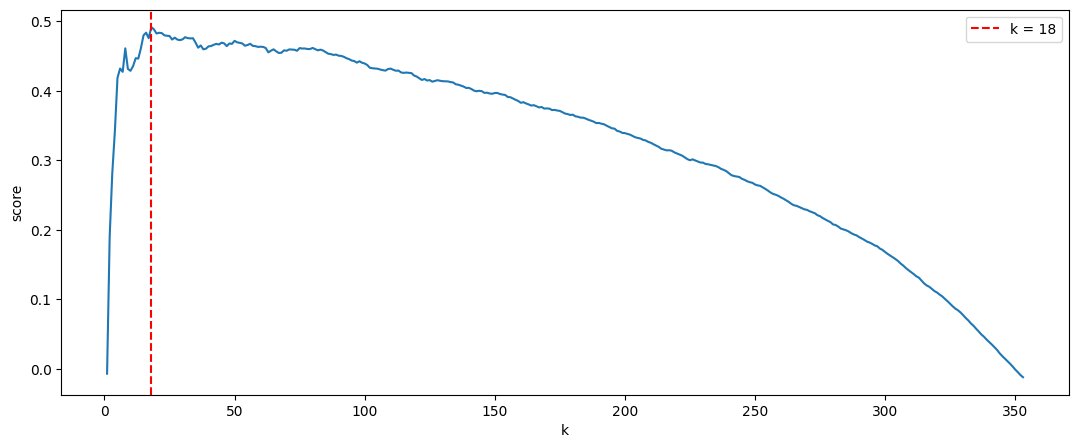

In [238]:
plt.figure(figsize = (13, 5))
plt.plot(scores.keys(), scores.values())
plt.axvline(best_k, color = 'red', linestyle = '--', label = f"k = {best_k}")
plt.xlabel('k')
plt.ylabel('score')
plt.legend()
plt.show()

In [240]:
model.n_neighbors = best_k

model.score(X_test_scaled, y_test)

0.4914114901927469

> 하이퍼 파라미터 조정으로 기존 0.41에 비해 약 8% 정도 정확도가 향상되었다.

[8] 최적의 점수를 내기 위한 피쳐 조합과 k 찾기

In [243]:
all_features = diabetes['data'][['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
all_features

,age,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...
437,60.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [256]:
import itertools

# 수치형 변수들
variables = ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

# 모든 조합을 저장할 리스트
all_combinations = []

for i in range(1, len(variables) + 1):
    for j in list(itertools.combinations(variables, i)):
        all_combinations.append(j)

all_combinations

[('age',),
 ('bmi',),
 ('bp',),
 ('s1',),
 ('s2',),
 ('s3',),
 ('s4',),
 ('s5',),
 ('s6',),
 ('age', 'bmi'),
 ('age', 'bp'),
 ('age', 's1'),
 ('age', 's2'),
 ('age', 's3'),
 ('age', 's4'),
 ('age', 's5'),
 ('age', 's6'),
 ('bmi', 'bp'),
 ('bmi', 's1'),
 ('bmi', 's2'),
 ('bmi', 's3'),
 ('bmi', 's4'),
 ('bmi', 's5'),
 ('bmi', 's6'),
 ('bp', 's1'),
 ('bp', 's2'),
 ('bp', 's3'),
 ('bp', 's4'),
 ('bp', 's5'),
 ('bp', 's6'),
 ('s1', 's2'),
 ('s1', 's3'),
 ('s1', 's4'),
 ('s1', 's5'),
 ('s1', 's6'),
 ('s2', 's3'),
 ('s2', 's4'),
 ('s2', 's5'),
 ('s2', 's6'),
 ('s3', 's4'),
 ('s3', 's5'),
 ('s3', 's6'),
 ('s4', 's5'),
 ('s4', 's6'),
 ('s5', 's6'),
 ('age', 'bmi', 'bp'),
 ('age', 'bmi', 's1'),
 ('age', 'bmi', 's2'),
 ('age', 'bmi', 's3'),
 ('age', 'bmi', 's4'),
 ('age', 'bmi', 's5'),
 ('age', 'bmi', 's6'),
 ('age', 'bp', 's1'),
 ('age', 'bp', 's2'),
 ('age', 'bp', 's3'),
 ('age', 'bp', 's4'),
 ('age', 'bp', 's5'),
 ('age', 'bp', 's6'),
 ('age', 's1', 's2'),
 ('age', 's1', 's3'),
 ('age', 's1', 

In [280]:
best_score_list = []

for i in range(len(all_combinations)):
    x = df.loc[:, all_combinations[i]]
    X_train, X_test, y_train, y_test = train_test_split(x, target, train_size=0.8, random_state=42)
    mm = MinMaxScaler()
    mm.fit(X_train)
    X_train_scaled = mm.transform(X_train)
    X_test_scaled = mm.transform(X_test)
    model = KNeighborsRegressor()
    model.fit(X_train_scaled, y_train)
    scores = {}
    for k in range(1, len(X_train_scaled) + 1):
        model.n_neighbors = k
        score = model.score(X_test_scaled, y_test)
        scores[k] = score

    best_score_list.append(sorted(scores.items(), key = lambda x : x[1], reverse = True)[0])

In [338]:
final_best_k = sorted(best_score_list, key = lambda x : x[1], reverse = True)[0][0]
final_best_k

18

In [326]:
best_score_value_list = [i[1] for i in best_score_list]
best_score_value_list[:5]

[0.020483099548324946,
 0.2585270009649444,
 0.18559646453963774,
 0.06313271651418462,
 0.06901885879409142]

In [327]:
best_score_dict = {idx : score for idx, score in enumerate(best_score_value_list)}
best_score_dict

{0: 0.020483099548324946,
 1: 0.2585270009649444,
 2: 0.18559646453963774,
 3: 0.06313271651418462,
 4: 0.06901885879409142,
 5: 0.1844953340411788,
 6: 0.21345093194216547,
 7: 0.3983226193178996,
 8: 0.1439467462938968,
 9: 0.2841120055304981,
 10: 0.15274173631944565,
 11: 0.06156119240497082,
 12: 0.04678705558926732,
 13: 0.18787457027745413,
 14: 0.25037982354611577,
 15: 0.4043034785561752,
 16: 0.13714098801404218,
 17: 0.3325732792321129,
 18: 0.2778084343522219,
 19: 0.2662212588031819,
 20: 0.2988485875196588,
 21: 0.3983742782696761,
 22: 0.48959602535447677,
 23: 0.329645290968275,
 24: 0.192048817819231,
 25: 0.17483994170027117,
 26: 0.26662082499540674,
 27: 0.3039724833647891,
 28: 0.44556575996840897,
 29: 0.21127718568061815,
 30: 0.10808438415418409,
 31: 0.25752593504929944,
 32: 0.19914243301177104,
 33: 0.36149011667438335,
 34: 0.17276990867572017,
 35: 0.25421420594700994,
 36: 0.23010388258203063,
 37: 0.3784230810984779,
 38: 0.14610546097247257,
 39: 0.26424

In [328]:
# 최고의 피쳐 조합 인덱스, 정확도
best_score_index, best_score_value = sorted(best_score_dict.items(), key = lambda x : x[1], reverse = True)[0]
best_score_index, best_score_value

(77, 0.5118274802567704)

In [330]:
# 최고의 피쳐 조합
best_combination = all_combinations[best_score_index]
best_combination

('bmi', 'bp', 's5')

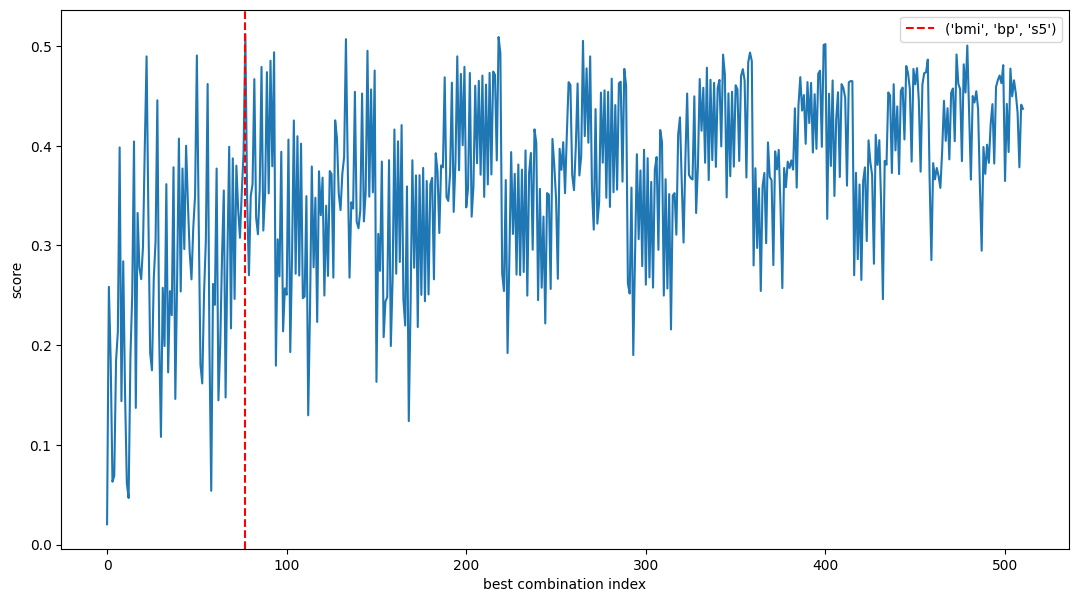

In [334]:
plt.figure(figsize = (13, 7))
plt.plot(range(len(best_score_list)), [i[1] for i in best_score_list])
plt.xlabel('best combination index')
plt.ylabel('score')
plt.axvline(best_score_index, color = 'red', linestyle = '--', label = f"{best_combination}")
plt.legend()
plt.show()

> 최적의 피쳐로 ('bmi', 'bp', 's5'), 최적의 k로 18 확인

In [346]:
x = df.loc[:, ('bmi', 'bp', 's5')]
X_train, X_test, y_train, y_test = train_test_split(x, target, train_size=0.8, random_state=42)

In [347]:
mm = MinMaxScaler()
mm.fit(X_train)

MinMaxScaler()

In [348]:
X_train_scaled = mm.transform(X_train)
X_test_scaled = mm.transform(X_test)

In [349]:
model = KNeighborsRegressor(n_neighbors = final_best_k)
model.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=18)

In [350]:
model.score(X_test_scaled, y_test)

0.5118274802567704

> 최종적으로 약 51% 정확도를 가지는 모델 생성